In [2]:
# Let's download the Twitter samples that are available in the NLTK library:

import nltk
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

In [3]:
# Let's perform Tokenisation:

from nltk.corpus import twitter_samples
nltk.download('punkt')
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

# This code tokenises the positive_tweets.json dataset
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
# Let's perform the stemming and lemmatisation process

import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.tag import pos_tag
from nltk.corpus import twitter_samples
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

print(pos_tag(tweet_tokens[0]))
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word,pos))
    return lemmatized_sentence
     
print(lemmatize_sentence(tweet_tokens[0]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('#FollowFriday', 'JJ'), ('@France_Inte', 'NNP'), ('@PKuchly57', 'NNP'), ('@Milipol_Paris', 'NNP'), ('for', 'IN'), ('being', 'VBG'), ('top', 'JJ'), ('engaged', 'VBN'), ('members', 'NNS'), ('in', 'IN'), ('my', 'PRP$'), ('community', 'NN'), ('this', 'DT'), ('week', 'NN'), (':)', 'NN')]


LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\mohit/nltk_data'
    - 'C:\\Users\\mohit\\anaconda3\\nltk_data'
    - 'C:\\Users\\mohit\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\mohit\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\mohit\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [15]:
# Let's perform the cleaning of the data

import re, string
nltk.download('stopwords')

def remove_noise(tweet_tokens, stop_words = ()):
    cleaned_tokens = []
    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','',token)
        token = re.sub("(@[A-Za-z0-9_]+)","",token)
        if tag.startswith("NN"):
            pos = 'n'
        else:
            pos = 'a'
        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)
        
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens
positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []
for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))
for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'stop_words' is not defined

In [16]:
# Let's create a frequency matrix.

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(positive_cleaned_tokens_list)

from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))

[]


In [17]:
# Llet's prepare the data for modelling by changing the format of the cleaned data.

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield_dict([token, True] for token in tweet_tokens)
        
positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

print(positive_cleaned_tokens_list)
print(list(positive_tokens_for_model))

[]


TypeError: 'NoneType' object is not iterable

In [18]:
# Let's perform data preparation and split the dataset according to Positive and Negative sentiments:

import random
positive_dataset = [(tweet_dict, "Positive") for tweet_dict in positive_tokens_for_model]
negative_dataset = [(tweet_dict, "Negative") for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]

TypeError: 'NoneType' object is not iterable

In [20]:
# Let's build the model using the Naive Bayes classifier:

from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

NameError: name 'train_data' is not defined

In [22]:
# As in step 9, let's test the model:

from nltk.tokenize import word_tokenize

custom_tweet = "I ordered it :) and loved it."
custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\mohit/nltk_data'
    - 'C:\\Users\\mohit\\anaconda3\\nltk_data'
    - 'C:\\Users\\mohit\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\mohit\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\mohit\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


## Word Cloud

In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


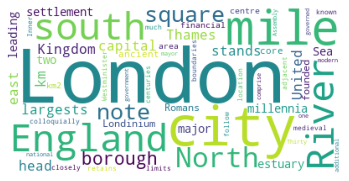

In [26]:
text = """ London is the capital and largests city of England and the United Kingdom. [8][9] The city stands on the River Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea. London has been a major settlement for two millennia. Londinium was founded by the Romans. [10] The City of London, London's ancient core and financial centre - an area of just 1.12 square miles (2.9 km2) and colloquially known as the Square Mile - retains boundaries that closely follow its medieval limits. [11][12][13][14][15] [note 1] The adjacent City of Westminister is an Inner London borough and has for centuries been the location of much of the national government. Thirty one additional boroughs north and south of the river also comprise modern London. London is governed by the mayor of London and the London Assembly. [16][note 2][17]"""

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=STOPWORDS, background_color = 'white', max_words=300).generate(text)

plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Topic Modelling and Gensim

In [28]:
import gensim
from gensim import corpora
from pprint import pprint

# How to create a dictionary from a list of sentences?
documents = ["London is the capital and largest city of England and the United Kingdom. The city stands on the Riven Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea."]

documents_2 = ["London is considered to be one of the world's most important global cities and has been called the world's most powerful, most desirable, most influential, most visited, most expensive, sustainable, most investment-friendly, and most-popular-for-work [29] city."]

# Tokenize(split) the sentences into words
texts = [[text for text in doc.split()] for doc in documents]

# Create a dictionary
dictionary = corpora.Dictionary(texts)

# Get information about the dictionary
print(dictionary)

Dictionary(30 unique tokens: ['(80', '50-mile', 'England', 'England,', 'Kingdom.']...)


In [29]:
print(dictionary.token2id)

{'(80': 0, '50-mile': 1, 'England': 2, 'England,': 3, 'Kingdom.': 4, 'London': 5, 'North': 6, 'Riven': 7, 'Sea.': 8, 'Thames': 9, 'The': 10, 'United': 11, 'and': 12, 'at': 13, 'capital': 14, 'city': 15, 'estuary': 16, 'head': 17, 'in': 18, 'is': 19, 'its': 20, 'km)': 21, 'largest': 22, 'leading': 23, 'of': 24, 'on': 25, 'south-east': 26, 'stands': 27, 'the': 28, 'to': 29}


## Bag of Words and Gensim

In [31]:
pip install tokenizer

Note: you may need to restart the kernel to use updated packages.


In [32]:
# A corpus object that contains the word id and its frequency in each document will look like the below:

from gensim.utils import simple_preprocess

# List with 2 sentences
my_docs = ["London is the capital and largest city of England, London is considered to be one of the world's most important global cities"]

# Tokenise the docs
tokenize_list = [simple_processes(doc) for doc in my_docs]

# Create the Corpus
mydict = corpora.Dictionary()
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_list]
pprint(mycorpus)

NameError: name 'simple_processes' is not defined

# Section 5 Exercises

**Task 1:** Create a word cloud for the following text:

text = """Natural Language Processing (NLP) is an area of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyse large amounts of natural language data. Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation"""

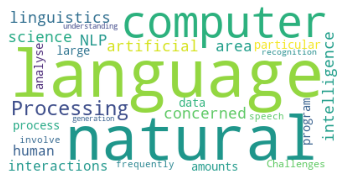

In [33]:
text = """Natural Language Processing (NLP) is an area of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyse large amounts of natural language data. Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation"""

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=STOPWORDS, background_color = 'white', max_words=300).generate(text)

plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()